## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 6.1: beautiful optical view of the Rosette HII region

#### uses DSS fits files from skyview


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
%matplotlib inline

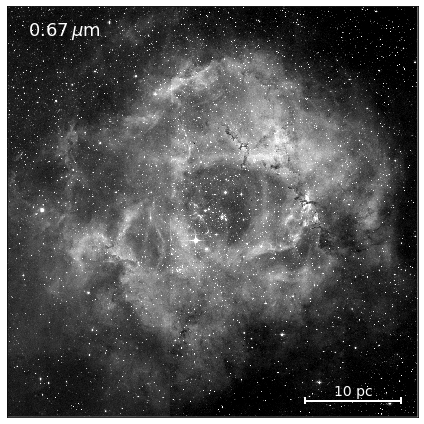

In [5]:
fig = plt.figure(figsize=(6,6))

hdu = fits.open('rosette_DSS2_red.fits')
wcs1 = WCS(hdu[0])
ax1 = fig.add_subplot(111, projection=wcs1)
im1 = hdu[0].data
hd1 = hdu[0].header
hdu.close()

# manually crop image
imin, imax = 120, 880
jmin, jmax = 70, 830

# manually set grayscale limits and a simple linear scale seems to work well
#print(im1.min(),im1.max())
ax1.imshow(im1[imin:imax, jmin:jmax], cmap='gray', origin='lower', vmin=5000, vmax=16000)

for i in (0,1):
    ax1.coords[i].set_ticks_visible(False)
    ax1.coords[i].set_ticklabel_visible(False)
    ax1.coords[i].set_ticks_visible(False)
    ax1.coords[i].set_ticklabel_visible(False)
    ax1.coords[i].set_axislabel('')
    ax1.coords[i].set_axislabel('')
ax1.text(0.05,0.93,r'$0.67\,\mu$m', {'color': 'w', 'fontsize': 18}, transform=ax1.transAxes)

# scale bar
ax1.set_xlim(0,imax-imin-1)
ax1.set_ylim(0,jmax-jmin-1)
dx = hd1['CDELT1']
# 0.002 deg = 7.2 arcsec per pixel = 0.056 pc at 1.6 kpc
xbar = 179
x0 = 550
x1 = x0 + xbar
y0 = 30
dy = 5
ax1.plot([x0,x1],[y0,y0], 'w-', lw=2)
ax1.plot([x0,x0],[y0-dy,y0+dy], 'w-', lw=2)
ax1.plot([x1,x1],[y0-dy,y0+dy], 'w-', lw=2)
ax1.text(0.5*(x0+x1), y0+2*dy, '10 pc', color='white', fontsize=14, ha='center')

plt.tight_layout()
plt.savefig('rosette.pdf')